## Dependencies

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleansing and Feature Engineering

In [2]:
df_raw = pd.read_csv('application_train.csv')

In [3]:
#Selecting columns that will be used in analysis and modelling

cols_to_include = ['SK_ID_CURR','TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                  'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                  'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                  'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                  'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
                  'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 
                  'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']

In [4]:
df = df_raw.copy()

df = df[cols_to_include]

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


## Handle Missing Values

In [5]:
cols_with_missing = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for col in cols_with_missing:
    print(f'Feature {col} : {np.round(df[col].isnull().mean() * 100, 4)}% Missing Values')

Feature AMT_ANNUITY : 0.0039% Missing Values
Feature AMT_GOODS_PRICE : 0.0904% Missing Values
Feature NAME_TYPE_SUITE : 0.4201% Missing Values
Feature OCCUPATION_TYPE : 31.3455% Missing Values


In [6]:
### Categorical features with missing
cat_with_nan = [feature for feature in cols_with_missing if df[feature].dtypes == 'O']

for feature in cat_with_nan:
    print(f'{feature}: {df[feature].unique()}')

NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [7]:
### Filling missing values of categorical feature with Unknown

def fill_cat_nan(dataset, features):
    data = dataset.copy()
    data[features] = data[features].fillna('Unknown')
    return data

dataset = fill_cat_nan(df, cat_with_nan)
dataset[cat_with_nan].isnull().sum()

NAME_TYPE_SUITE    0
OCCUPATION_TYPE    0
dtype: int64

In [8]:
### Numerical features with missing
num_with_nan = [feature for feature in cols_with_missing if df[feature].dtypes != 'O']

In [9]:
### Filling missing values of numerical features with median

for feature in num_with_nan:
    median_value = dataset[feature].median()
    
    dataset[feature].fillna(median_value, inplace = True)
    
dataset[num_with_nan].isnull().sum()

AMT_ANNUITY        0
AMT_GOODS_PRICE    0
dtype: int64

In [10]:
dataset.isnull().sum().sum()

0

## Numerical Features

### Transform Negative Days features to Years

In [11]:
### transform to years

dataset['AGE'] = dataset['DAYS_BIRTH'].apply(lambda x: np.round(-x/365))
dataset['YEAR_EMPLOYED'] = dataset['DAYS_EMPLOYED'].apply(lambda x: np.round(-x/365))
dataset['YEAR_REGISTRATION'] = dataset['DAYS_REGISTRATION'].apply(lambda x: np.round(-x/365))
dataset['YEAR_ID_PUBLISH'] = dataset['DAYS_ID_PUBLISH'].apply(lambda x: np.round(-x/365))

In [12]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,26.0,2.0,10.0,6.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School,46.0,3.0,3.0,1.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government,52.0,1.0,12.0,7.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52.0,8.0,27.0,7.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,55.0,8.0,12.0,9.0


In [13]:
dataset = dataset.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], axis = 1)

dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,26.0,2.0,10.0,6.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School,46.0,3.0,3.0,1.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government,52.0,1.0,12.0,7.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52.0,8.0,27.0,7.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,55.0,8.0,12.0,9.0


### Continuous Features

In [14]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' 
                      and feature not in ['SK_ID_CURR', 'TARGET']]
numerical_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'AGE',
 'YEAR_EMPLOYED',
 'YEAR_REGISTRATION',
 'YEAR_ID_PUBLISH']

In [15]:
continuous_features = [feature for feature in numerical_features if dataset[feature].nunique() > 25]

dataset[continuous_features].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION
0,202500.0,406597.5,24700.5,351000.0,0.018801,26.0,2.0,10.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,46.0,3.0,3.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,52.0,1.0,12.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,8.0,27.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,55.0,8.0,12.0


In [16]:
dataset[continuous_features].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,43.938646,-174.895337,13.659440
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,11.964047,387.185661,9.659369
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,21.000000,-1001.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.000000,1.000000,6.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.000000,3.000000,12.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,54.000000,8.000000,20.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,49.000000,68.000000


There are negative values in YEAR_EMPLOYED

In [17]:
### Handling Negative Year
def neg_to_pos(x):
    if x >= 0:
        return x
    else:
        return -x

dataset['YEAR_EMPLOYED'] = dataset['YEAR_EMPLOYED'].apply(neg_to_pos)

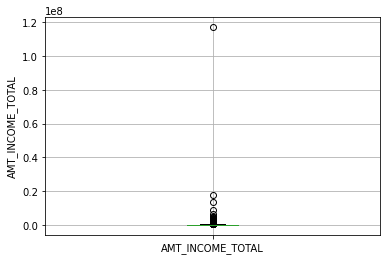

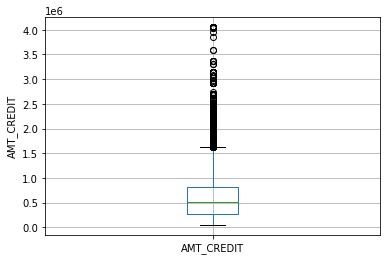

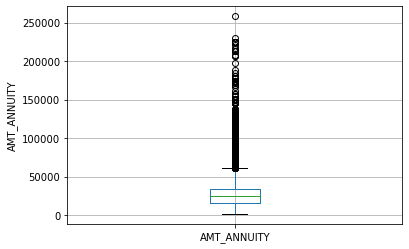

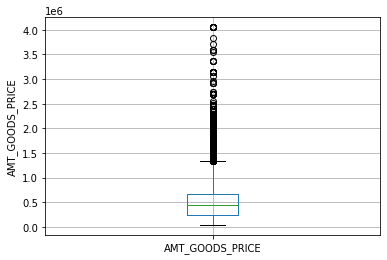

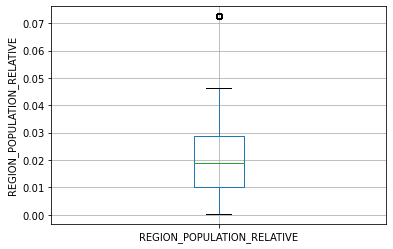

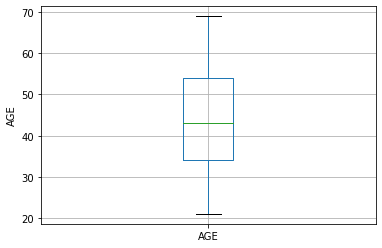

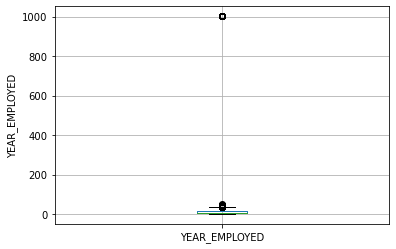

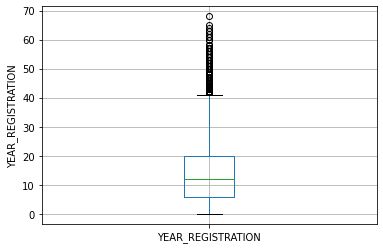

In [18]:
### Checking Outliers
for feature in continuous_features:
    data = dataset.copy()
    
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.show()

There are many outliers

In [19]:
### Removing Outliers
cols_w_out = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
             'REGION_POPULATION_RELATIVE', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION']

def remove_outliers(val):
    if val < q1 - 1.5*IQR or val > q3 + 1.5*IQR:
        return median
    else:
        return val

for col in cols_w_out:
    median = dataset[col].median()
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    IQR = q3 - q1
    dataset[col] = dataset[col].apply(remove_outliers)

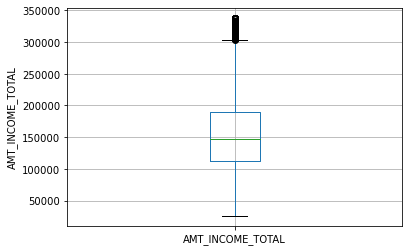

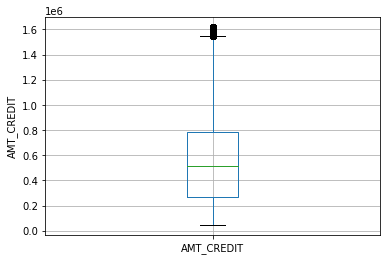

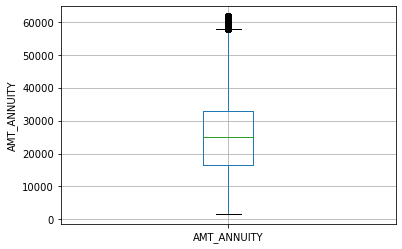

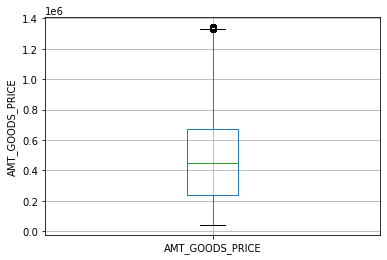

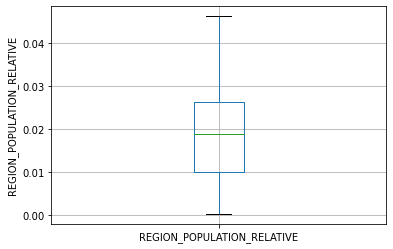

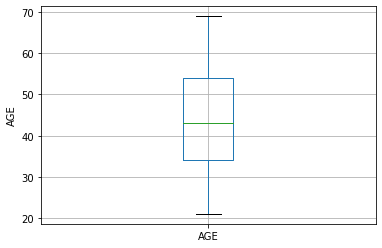

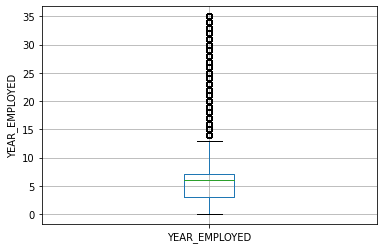

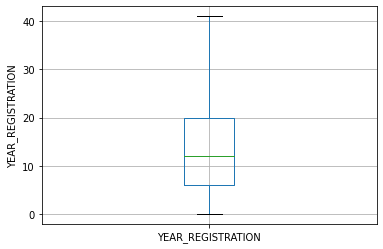

In [20]:
for feature in continuous_features:
    data = dataset.copy()
    
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.show()

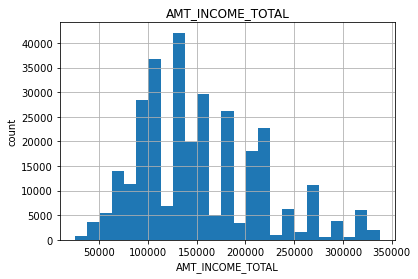

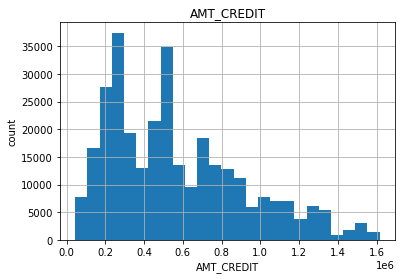

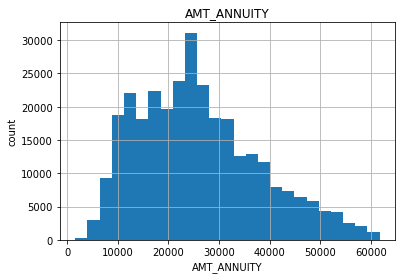

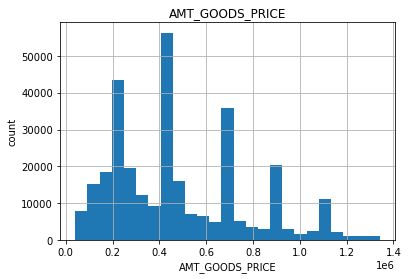

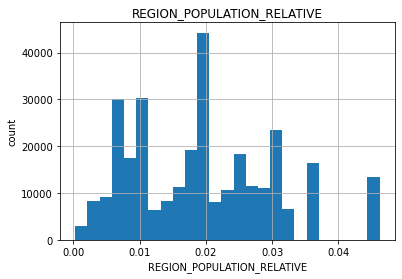

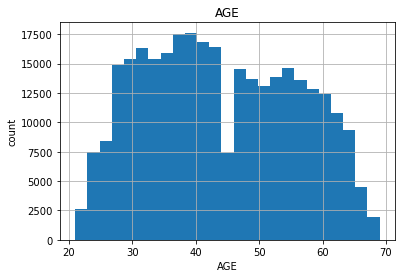

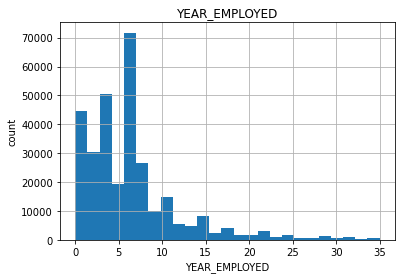

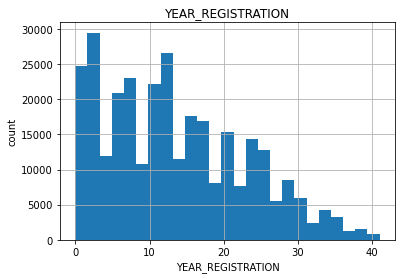

In [21]:
### Plotting histogram for continuous features

for feature in continuous_features:
    data = dataset.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [22]:
### Log transformation for continuous features

cols_to_log = [feature for feature in continuous_features if 0 not in dataset[feature].unique()]

cols_to_log

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AGE']

In [23]:
for col in cols_to_log:
    dataset[col] = dataset[col].apply(lambda x: np.log(x))

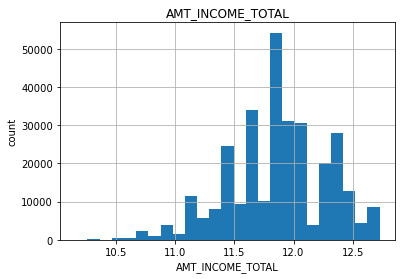

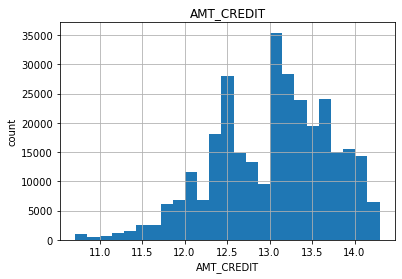

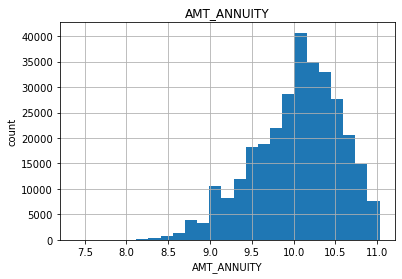

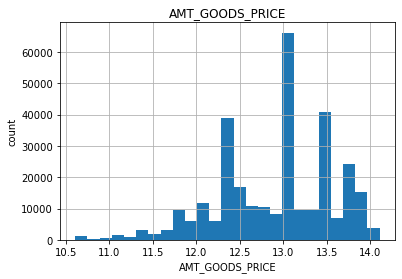

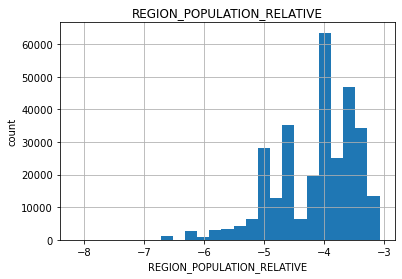

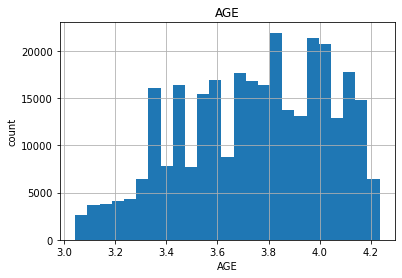

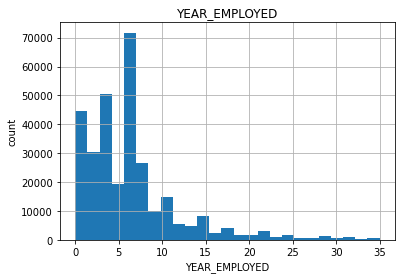

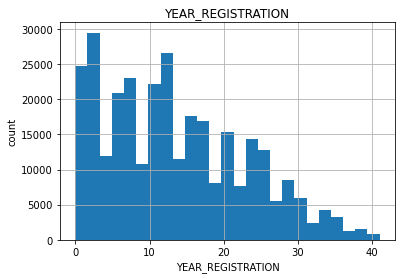

In [24]:
for col in continuous_features:
    data = dataset.copy()
    
    data[col].hist(bins = 25)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(col)
    plt.show()

### Discrete Features

In [25]:
dis_features = [feature for feature in numerical_features if dataset[feature].nunique() <= 25]

dis_features

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEAR_ID_PUBLISH']

In [26]:
### Remove features with low variance
dis_to_drop = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY']

dataset = dataset.drop(dis_to_drop, axis = 1)

## Categorical Features

In [27]:
cat_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

cat_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [28]:
for feature in cat_features:
    print(f'{feature} : {dataset[feature].nunique()} Categories')

NAME_CONTRACT_TYPE : 2 Categories
CODE_GENDER : 3 Categories
FLAG_OWN_CAR : 2 Categories
FLAG_OWN_REALTY : 2 Categories
NAME_TYPE_SUITE : 8 Categories
NAME_INCOME_TYPE : 8 Categories
NAME_EDUCATION_TYPE : 5 Categories
NAME_FAMILY_STATUS : 6 Categories
NAME_HOUSING_TYPE : 6 Categories
OCCUPATION_TYPE : 19 Categories
WEEKDAY_APPR_PROCESS_START : 7 Categories
ORGANIZATION_TYPE : 58 Categories


In [29]:
### Drop feature with too many categories
dataset = dataset.drop('ORGANIZATION_TYPE', axis = 1)

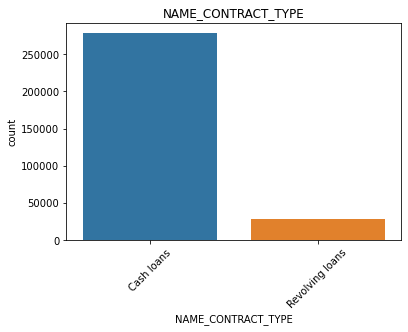

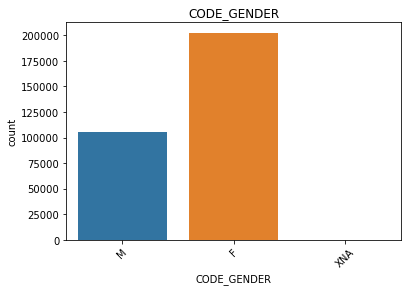

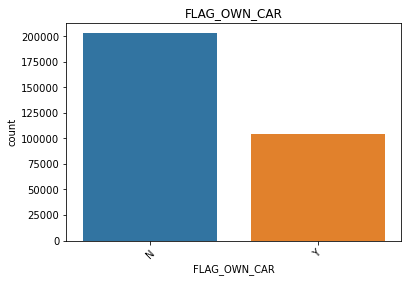

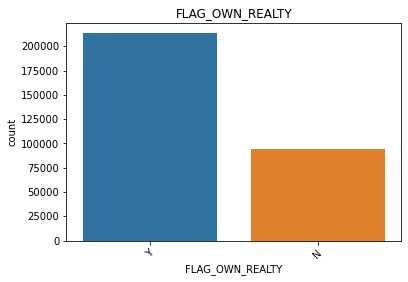

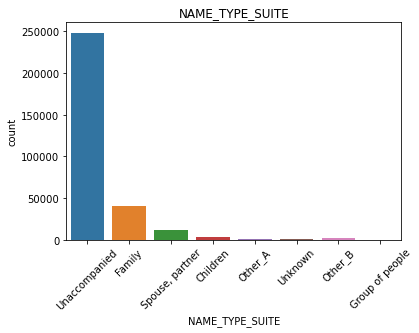

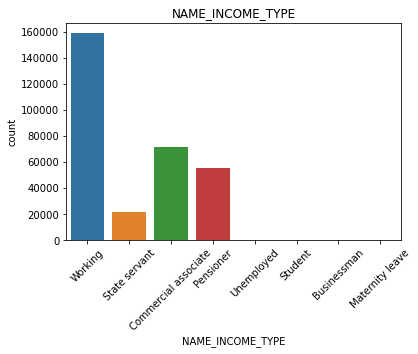

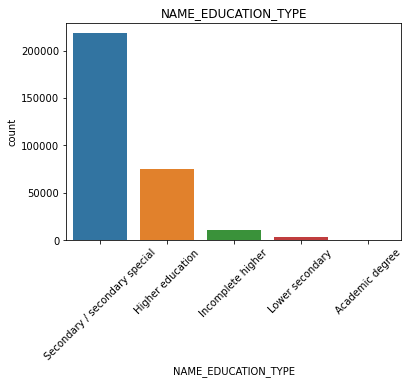

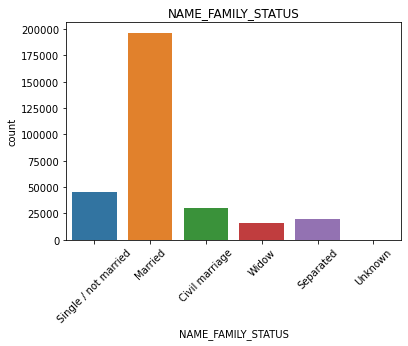

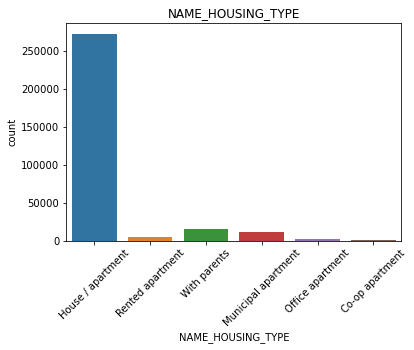

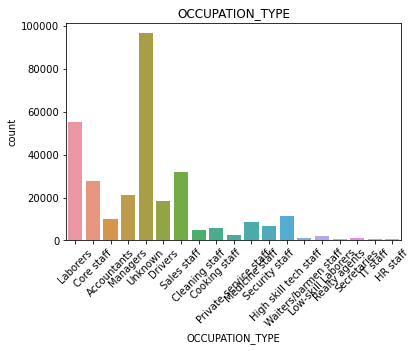

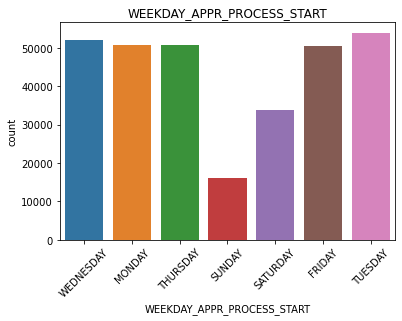

In [30]:
cat_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

for feature in cat_features:
    sns.countplot(data = dataset, x = feature)
    plt.title(feature)
    plt.xticks(rotation = '45')
    plt.show()

In [31]:
### Drop categorical features with low variances
cat_to_drop = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

dataset = dataset.drop(cat_to_drop, axis = 1)

In [32]:
dataset.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH
0,100002,1,M,N,Y,12.218495,12.915579,10.114579,12.768542,Working,Secondary / secondary special,-3.973845,1,0,1,Laborers,2,2,WEDNESDAY,10,0,0,3.258097,2.0,10.0,6.0
1,100003,0,F,N,N,12.506177,14.072864,10.482864,13.937286,State servant,Higher education,-5.643346,1,0,1,Core staff,1,1,MONDAY,11,0,0,3.828641,3.0,3.0,1.0
2,100004,0,M,Y,Y,11.119883,11.813030,8.817298,11.813030,Working,Secondary / secondary special,-4.601975,1,1,1,Laborers,2,2,MONDAY,9,0,0,3.951244,1.0,12.0,7.0
3,100006,0,F,N,Y,11.813030,12.652944,10.298448,12.601487,Working,Secondary / secondary special,-4.825942,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,3.951244,8.0,27.0,7.0
4,100007,0,M,N,Y,11.707670,13.148031,9.992665,13.148031,Working,Secondary / secondary special,-3.552148,1,0,0,Core staff,2,2,THURSDAY,11,1,1,4.007333,8.0,12.0,9.0


## Correlation Checking

<AxesSubplot:>

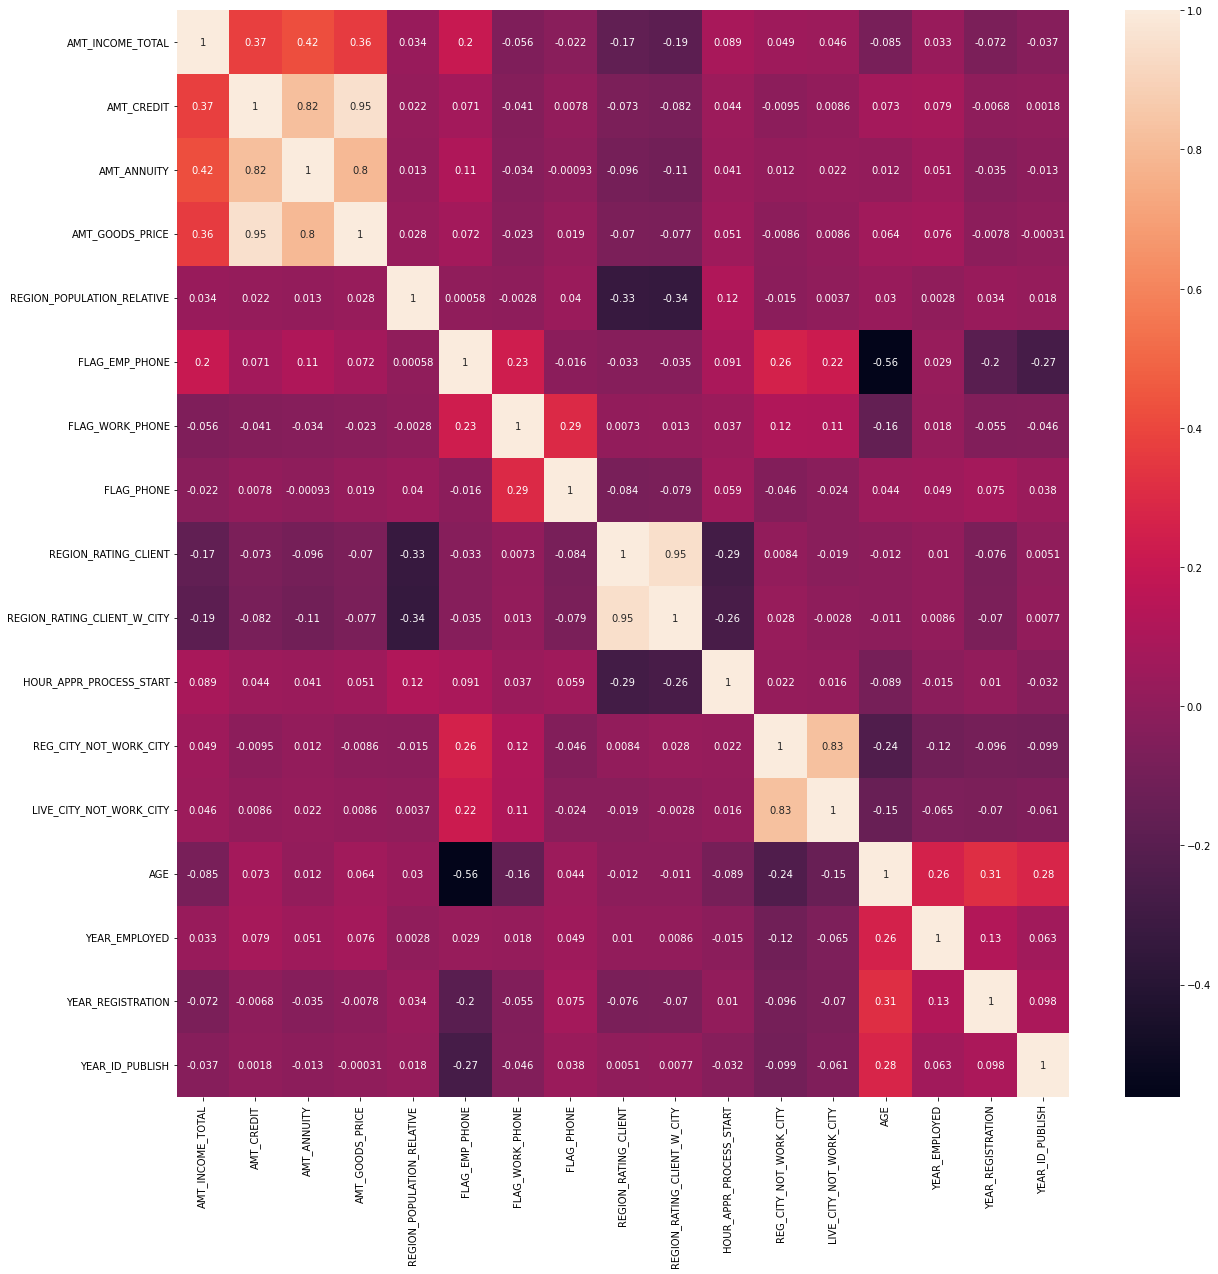

In [33]:
plt.figure(figsize = (20, 20))
sns.heatmap(dataset.drop(['SK_ID_CURR', 'TARGET'], axis = 1).corr(), annot = True)

## Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
cols_to_le = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

le = LabelEncoder()

for col in cols_to_le:
    dataset[col] = le.fit_transform(dataset[col])

In [36]:
dataset.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH
0,100002,1,1,0,1,12.218495,12.915579,10.114579,12.768542,Working,Secondary / secondary special,-3.973845,1,0,1,Laborers,2,2,WEDNESDAY,10,0,0,3.258097,2.0,10.0,6.0
1,100003,0,0,0,0,12.506177,14.072864,10.482864,13.937286,State servant,Higher education,-5.643346,1,0,1,Core staff,1,1,MONDAY,11,0,0,3.828641,3.0,3.0,1.0
2,100004,0,1,1,1,11.119883,11.813030,8.817298,11.813030,Working,Secondary / secondary special,-4.601975,1,1,1,Laborers,2,2,MONDAY,9,0,0,3.951244,1.0,12.0,7.0
3,100006,0,0,0,1,11.813030,12.652944,10.298448,12.601487,Working,Secondary / secondary special,-4.825942,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,3.951244,8.0,27.0,7.0
4,100007,0,1,0,1,11.707670,13.148031,9.992665,13.148031,Working,Secondary / secondary special,-3.552148,1,0,0,Core staff,2,2,THURSDAY,11,1,1,4.007333,8.0,12.0,9.0


In [37]:
## One Hot Encoding
cols_to_ohe = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

dataset = pd.get_dummies(dataset, columns = cols_to_ohe, drop_first = True)

In [38]:
dataset.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002,1,1,0,1,12.218495,12.915579,10.114579,12.768542,-3.973845,1,0,1,2,2,10,0,0,3.258097,2.0,10.0,6.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,0,0,0,12.506177,14.072864,10.482864,13.937286,-5.643346,1,0,1,1,1,11,0,0,3.828641,3.0,3.0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,100004,0,1,1,1,11.119883,11.813030,8.817298,11.813030,-4.601975,1,1,1,2,2,9,0,0,3.951244,1.0,12.0,7.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,100006,0,0,0,1,11.813030,12.652944,10.298448,12.601487,-4.825942,1,0,0,2,2,17,0,0,3.951244,8.0,27.0,7.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,1,0,1,11.707670,13.148031,9.992665,13.148031,-3.552148,1,0,0,2,2,11,1,1,4.007333,8.0,12.0,9.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Feature Selection

In [39]:
feat_to_drop = ['SK_ID_CURR','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'LIVE_CITY_NOT_WORK_CITY']
data_model = dataset.drop(feat_to_drop, axis = 1)

## Data Standarization

In [40]:
X = data_model.drop('TARGET', axis = 1)
y = data_model['TARGET']

In [41]:
## Checking target balance
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [42]:
## Over Sampling
from imblearn import over_sampling

ros = over_sampling.RandomOverSampler(random_state = 1)
X_resampled, y_resampled = ros.fit_resample(X,y)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_model = scaler.fit_transform(X_resampled)

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model, y_resampled, test_size=0.2, random_state=24)

## Modelling (LogReg)

### Training Model

In [45]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter = 1000)

reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Validation

In [46]:
print(f'Accuracy for train data: {reg.score(X_train, y_train)}')
print(f'Accuracy for test data: {reg.score(X_test, y_test)}')

Accuracy for train data: 0.6163560669206296
Accuracy for test data: 0.6180411231483529


In [47]:
### ROC and AUC
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
y_pred_proba = reg.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

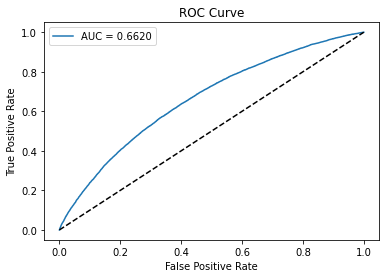

In [49]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Modelling (RandomForest)

### Training Model

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 15)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

### Model Validation

In [55]:
print(f'Accuracy for train data: {clf.score(X_train, y_train)}')
print(f'Accuracy for test data: {clf.score(X_test, y_test)}')

Accuracy for train data: 0.9999823125070474
Accuracy for test data: 0.995967278355074


In [51]:
y_pred_proba_2 = clf.predict_proba(X_test)[:][:,1]
df_actual_predicted_2 = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba_2, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_2.index = y_test.index

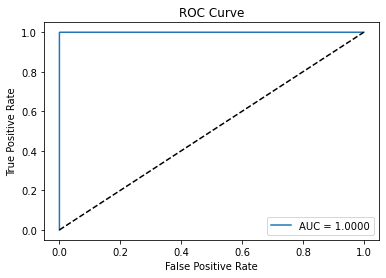

In [52]:
fpr, tpr, tr = roc_curve(df_actual_predicted_2['y_actual'], df_actual_predicted_2['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted_2['y_actual'], df_actual_predicted_2['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [54]:
data_model.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY', 'AGE',
       'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATI